In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file= "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model= "frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
         classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001B8576410D0>

In [19]:
img=cv2.imread(r'C:\\Users\\kelvin\\images\\truck\\image_36.jpg')

In [20]:
# print(img.shape())

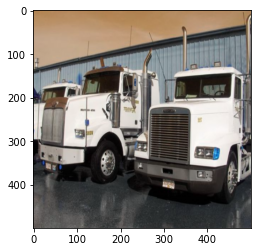

In [21]:
img = cv2.resize(img,(500,500))
plt.imshow(img)

In [22]:
print(img.shape)

(500, 500, 3)


In [23]:
# img=cv2.imread('images/apple fruit/image_1.jpg')
# plt.imshow(img)

In [24]:
ClassIndex,confidece,bbox = model.detect(img,confThreshold=0.55)

In [25]:
print(ClassIndex)

[8 8]


In [26]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,Conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale = font_scale,color=(0,255,0),thickness=1)

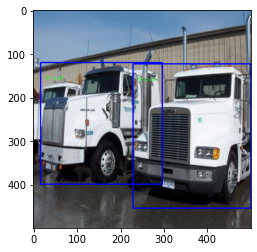

In [27]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [30]:
cap = cv2.VideoCapture(r"C:\\Users\\kelvin\\Downloads\\mixkit-street-with-people-walking-at-dusk-3428-medium.mp4")
# cap = cv2.VideoCapture(r"C:\Users\kelvin\Downloads\Cars,_Busy_Streets,_City_Traffic_-_No_Copyright_Royalty_Free_Stock_Videos(720p).mp4")

In [31]:
#Video
# cap = cv2.VideoCapture("mixkit-street-with-people-walking-at-dusk-3428-medium.mp4")


if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex,confidece,bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,
                            fontScale = font_scale,color = (0,255,0),thickness=3)
            
    cv2.imshow('Show',frame)
    
    if cv2.waitKey(1) & 0xff==ord('q'):
        break
cap.release()
cv2.destroyALLWindows()

[ 2  2  1  1 10  1  1  1  1  1  1  1  1  1  1  1]
[ 2  2  1  1  1  1 10  1  1  1  1  1  1  1  1]
[ 2  2  1  1  1  1  1  1  1  1 10  1  1  1  1  1]
[ 2  1  2  1  1  1  1 10  1  1  1  1]
[ 1  1  1  1  1  1  1 10  1  1]
[ 2  1  1  1  1 10  1  1  1  1  1  1  1 31  1  1]
[ 2  1  2  1  1  1 10  1  1  1  1  1  1]
[ 2  2  1  1  1 10  1  1  1  1  1  1  1  1]
[ 2  2  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1]
[ 1  2  1 10  2  1  1  1  1  1  1  1  1  1  1  1]
[ 2  1 31  2 10  1  1  1  1  1  1  1  1]
[ 1  2  1 10  1 31  1  2  1  1  1  1]
[ 1  1  1  1 31  2 10  1  1  1  1  1  1  1  1]
[ 1  1  2 10  1  1  1  1  1  1  1  1  1]
[ 1  1  2 10  2  1  1  1  1  1  1  1  1]
[ 1  1  1 10  1  1  1  1  1  1  1]
[ 1  1  1  1 10  1  1  1  1]
[ 1  1  1 10  1  1  1  1  1  1]
[ 1 10  1  1  1  1]
[ 1  1  1 10  1  1  3  1]
[ 1  1  1  1 10  1  1  1  1]
[ 1  1  1  1 10  1  1  1  1]
[ 1  1  1  1 10  1  1  1  1  1]
[ 1  1  1  1 10  1  1  1  1  1  1]
[ 1  1 10  1  1  1  1  1  1  1  1  1  1]
[ 1  1 10  2  1  1  1  1  1  

[ 1  1  1  1  1  1  1 10  1  1]
[ 1  1  1  1  1  1 10  1  1  1]
[ 1  1  1  1  1  1  1  1 10  1]
[ 1  1  1  1  1  1  1  1 10  1  1  1]
[ 1  1  1  1  1  1 10  1  1  1  1  1  1]
[ 1  1  1  1  1  1  1  1 10  1  1  1]
[ 1  1  1  1  1  1  2  1  1  2  1 10  1  1  1  1]
[ 1  1  1  1  1  1  1  1  1  1 10  1  1  1  1  2]
[ 1  1  1  1  1  1  1  1  1  1  1  1 10  1  1  2  1  1]
[ 1  1  1  1  1  2  1  1  1  1 10  1  1  1  1  1  1  1  1  2]
[ 1  1  1  1  2  1  1  1  1  1 10  1  1  1  1  1  1]
[ 2  1  1  1  2  1  1  1  1  1 10  1  1  1  1  1  1  1  1]
[ 1  2  1  1  1  1  1  1  1  1  1  1  2 10  1  1  1  1]
[ 1  2  1  1  2  1  1  1  1  1  1  1  1 10  1  1  1  1  1  1  1]
[ 1  2  1  1  2  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1  1]
[ 2  1  1  2  1  1  1  1 10  1  1  1  1  1  1  1  1  1]
[ 1  1  2  1  1  1  1  1  2 10  1  1  1  1  1  1  1  1]
[ 1  2  1  2  1  1  1  1  1  1  1 10  1  1  1  1  1  1]
[ 1  1  1  1  1  1  1  1  2 10  1  1  1  1  1  1  1]
[ 1  1  1  2  1  1  1  1  2 10  1  1  1  1  1  1]


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
#web cam
#Video
cap = cv2.VideoCapture(1)


if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex,confidece,bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,
                            fontScale = font_scale,color = (0,255,0),thickness=3)
            
    cv2.imshow('object detection by simple',frame)
    
    if cv2.waitKey(2) & 0xff==ord('q'):
        break
cap.release()
cv2.destroyALLWindows()

In [ ]:
# import cv2 as cv
# video = cv.VideoCapture(4)
# while True:
#     ret,frame = video.read()
#     if cv.waitKey(10) == ord('q'):
#         break
#     cv.imshow(r'C:\\Users\\kelvin\\images\\truck\\image_36.jpg')
    
# def return_camera_indices():
#     index = -2
#     arr =[]
#     i = 10
#     while i >  0:
#         cap = cv.VideoCapture(index)
#         if cap.read()[0]:
#             arr.append(index)
#             cap.release()
#     index += 1
#     i-=1
# return arr